#uploading and organizing the data - run

In [1]:
import numpy as np, pandas as pd, os, pickle


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('BoughtItems.csv')
df.shape

(1133522, 12)

In [5]:
df = df.head(500000)

#pickle

In [5]:
dump_file_name = '/content/drive/MyDrive/dump_cart.pickle'

Save

In [244]:
with open(dump_file_name, 'w+b') as out_file: 
    pickle.dump(df, out_file, pickle.HIGHEST_PROTOCOL)

Load

In [41]:
with open(dump_file_name,'rb') as in_file:
    df = pickle.load(in_file)

#building the training data - run

In [6]:
cart_dict = df.groupby(['BoughtTrolleyID'])['ProductTemplateID'].apply(lambda grp: list(grp.value_counts().index)).to_dict()

In [7]:
number_of_products = [len(cart_dict[x]) for x in cart_dict]

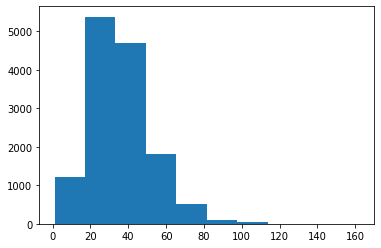

In [8]:
import matplotlib.pyplot as plt

plt.hist(number_of_products)
plt.show() 


In [9]:
dict_cart = {}
for x in cart_dict:
  if len(cart_dict[x]) > 15:
    dict_cart[x] = cart_dict[x]

cart_keys = list(dict_cart.keys())

In [10]:
n=len(dict_cart)

print("No.of.unique shopping carts is", n,"carts")

No.of.unique shopping carts is 12887 carts


In [11]:
vocab = dict()
for product in df['ProductTemplateID']:
  if product not in vocab:
    vocab[product] = len(vocab)

inverse_vocab = dict([(value, key) for key, value in vocab.items()])
print(f'Number of unique products (vocab size): {len(vocab)}')

Number of unique products (vocab size): 17228


In [12]:
import scipy.sparse
corpus = scipy.sparse.lil_matrix((n, len(vocab)),dtype=int)

for i,cart in enumerate(dict_cart.keys()):
  for product in dict_cart[cart]:
    corpus[i, vocab[product]] = 1

In [13]:
print(f'Matrix Density: {(corpus>0).sum()/(corpus.shape[0]*corpus.shape[1]):03f}')

Matrix Density: 0.002213


In [14]:
X = scipy.sparse.lil_matrix((n, len(vocab)),dtype=int)
Y = scipy.sparse.lil_matrix((n, len(vocab)),dtype=int)

In [15]:
import random

boolean_corpus = (corpus>0).toarray()

products_for_x, products_for_y = [], []

for i,cart in enumerate(boolean_corpus):
  products_in_cart = []

  for j in range(len(cart)):
    if cart[j]:
      products_in_cart.append(inverse_vocab[j])
      
  r = random.sample(products_in_cart, 5)
  products_for_x.append(r)
  products_for_y.append(list(set(products_in_cart) - set(r)))


In [16]:
for i,products in enumerate(products_for_x):
  for p in products:
    X[i, vocab[p]] = 1

In [17]:
for i,products in enumerate(products_for_y):
  for p in products:
    Y[i, vocab[p]] = 1

In [18]:
x_df = pd.DataFrame.sparse.from_spmatrix(X)
x_df.columns = vocab.keys()
x_df.index = dict_cart.keys()

y_df = pd.DataFrame.sparse.from_spmatrix(Y)
y_df.columns = vocab.keys()
y_df.index = dict_cart.keys()


In [19]:
#carts_products_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in cart_dict.items()])).T

In [20]:
prod_2_gen = []
for x in cart_keys:
  prod_2_gen.append(cart_dict[x])
  
prod_2_gen = [[str(x) for x in l] for l in prod_2_gen]

#split - run

In [21]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

# Useful machine-learning commands
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import metrics
from sklearn_pandas import DataFrameMapper


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)
print('Training set size: {0:d}\nTest set size: {1:d}'.format(len(x_train),len(x_test)))


Training set size: 10309
Test set size: 2578


In [273]:
# Bring the data into a proper format:
x_train_onehot = pd.get_dummies(x_train).values
x_test_onehot = pd.get_dummies(x_test).values

In [274]:
# Bring the data into a proper format:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

y_train_onehot.shape, y_test_onehot.shape 

((9419, 16901), (2355, 16901))

#TSNE

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE


In [29]:
lda_model = model = LatentDirichletAllocation(n_components=10, n_jobs=-1, verbose=1, random_state=42, max_iter=70)
lda_model.fit(corpus)
representation = lda_model.transform(corpus)

iteration: 1 of max_iter: 70
iteration: 2 of max_iter: 70
iteration: 3 of max_iter: 70
iteration: 4 of max_iter: 70
iteration: 5 of max_iter: 70
iteration: 6 of max_iter: 70
iteration: 7 of max_iter: 70
iteration: 8 of max_iter: 70
iteration: 9 of max_iter: 70
iteration: 10 of max_iter: 70
iteration: 11 of max_iter: 70
iteration: 12 of max_iter: 70
iteration: 13 of max_iter: 70
iteration: 14 of max_iter: 70
iteration: 15 of max_iter: 70
iteration: 16 of max_iter: 70
iteration: 17 of max_iter: 70
iteration: 18 of max_iter: 70
iteration: 19 of max_iter: 70
iteration: 20 of max_iter: 70
iteration: 21 of max_iter: 70
iteration: 22 of max_iter: 70
iteration: 23 of max_iter: 70
iteration: 24 of max_iter: 70
iteration: 25 of max_iter: 70
iteration: 26 of max_iter: 70
iteration: 27 of max_iter: 70
iteration: 28 of max_iter: 70
iteration: 29 of max_iter: 70
iteration: 30 of max_iter: 70
iteration: 31 of max_iter: 70
iteration: 32 of max_iter: 70
iteration: 33 of max_iter: 70
iteration: 34 of ma

In [30]:
import sklearn
tsne_model = TSNE(n_components=2,n_jobs=1, metric='cosine',random_state=42)
if isinstance(tsne_model, sklearn.manifold.TSNE):
    tsne_cooordinates = tsne_model.fit_transform(representation)
else:
    tsne_cooordinates = tsne_model.fit(representation)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


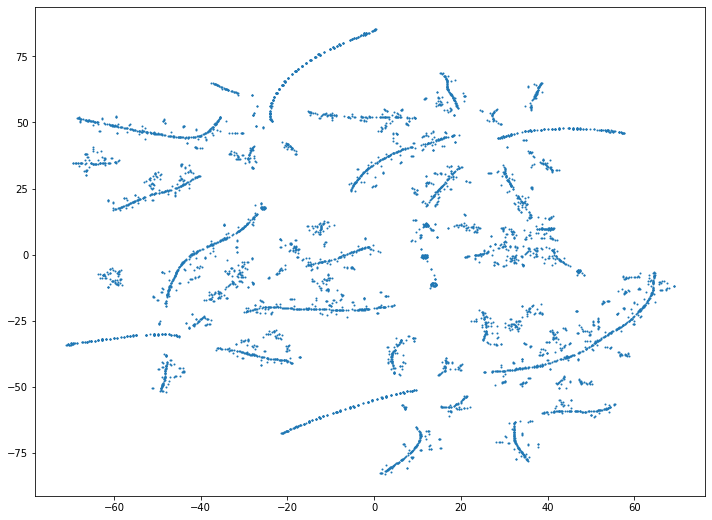

In [31]:
plt.figure(figsize=(12,9))
plt.scatter(tsne_cooordinates[:,0],tsne_cooordinates[:,1], s=1)
plt.show()

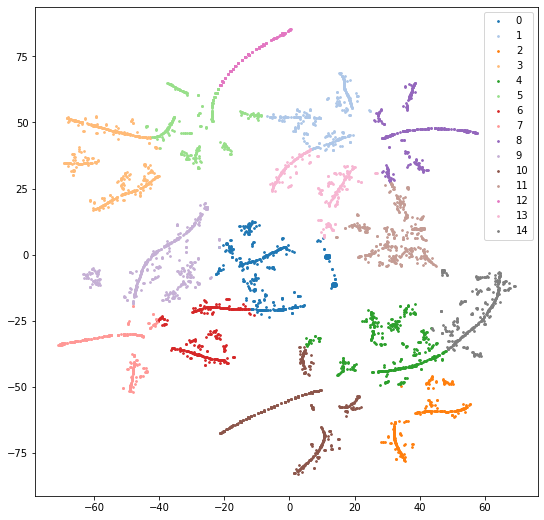

In [32]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

kmeans = KMeans(n_clusters=15)
tsne_clusters = kmeans.fit(tsne_cooordinates)
np.unique(tsne_clusters.labels_)
plt.figure(figsize=(9, 9))
colormap = cm.get_cmap('tab20')

for label in np.unique(tsne_clusters.labels_):
    plt.scatter(tsne_cooordinates[tsne_clusters.labels_==label,0],  tsne_cooordinates[tsne_clusters.labels_==label,1], 
                s=3,  color=colormap( label % 15), 
                label=label);
plt.legend()

#W2V

In [34]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, Word2Vec, KeyedVectors
from gensim.test.utils import common_texts

In [35]:
model_0 = gensim.models.Word2Vec(prod_2_gen ,window=7, min_count=2, sg=0, workers = 12) 
model_0.train(prod_2_gen, total_examples=len(prod_2_gen), epochs=5)

(949466, 982150)

In [169]:
sims = model_0.wv.most_similar(('4973','4653', '6526'), topn=5) 
sims

[('4910', 0.9952058792114258),
 ('5199', 0.9949454069137573),
 ('4644', 0.9948856234550476),
 ('4899', 0.9936501979827881),
 ('5364', 0.9935096502304077)]

In [38]:
sims = model_0.wv.most_similar('19984', topn=5) 
sims

[('16898', 0.9937911033630371),
 ('33712', 0.991845965385437),
 ('16922', 0.9898489117622375),
 ('22925', 0.9886221289634705),
 ('32152', 0.9853836297988892)]

In [39]:
sims = model_0.wv.most_similar('16162', topn=5) 
sims

[('24251', 0.9934321641921997),
 ('24247', 0.9928063154220581),
 ('22403', 0.9925510287284851),
 ('24766', 0.9918047189712524),
 ('23531', 0.9904707074165344)]

In [95]:
# #from sklearn.decomposition import TruncatedSVD
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# x_train_pca = pca.fit_transform(x_train_onehot)
# y_train_pca = pca.fit_transform(y_train_onehot)

# x_test_pca = pca.fit_transform(x_test_onehot)
# y_test_pca = pca.fit_transform(y_test_onehot)

# print(f"PCA: reduced dimentions from {x_train.shape} to {y_train_pca.shape}")

PCA: reduced dimentions from (2119, 11210) to (2119, 10)


#ANN - run - here it might crash

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from keras.layers import Dense, Input
from keras.models import Model


In [ ]:
# Define the model layout:
inputs = Input(shape=(x_train.shape[1],), sparse=True)

model = Sequential()
model.add(inputs)
model.add(Dense(x_train.shape[1], activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# embedding_layer = Embedding(input_dim=1000,output_dim=64)
# model.add(embedding_layer)
# model.add(LSTM(50))
# model.add(Dense(100, input_dim=len(vocab), activation='relu'))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(5000, activation='relu'))
# model.add(Dense(11210, activation='softmax'))
# outputs = Dense(y_train.shape[1], activation='softmax')(inputs)
# model.add(Dropout(0.3))


# Train the model:
fit = model.fit(x_train, y_train, epochs=10, verbose=2, batch_size = 32, validation_data=None)


Epoch 1/10


In [70]:
_, accuracy = model.evaluate(x_train, y_train)
_, accuracy = model.evaluate(x_test, y_test)

33/33 [==============================] - 12s 373ms/step - loss: 302.4908 - accuracy: 0.0438


In [71]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 13809)             190702290 
                                                                 
Total params: 190,702,290
Trainable params: 190,702,290
Non-trainable params: 0
_________________________________________________________________


In [108]:
y_pred = model.predict(x_test)
y_pred.shape

(1050, 13809)

In [114]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = x_test.columns
y_pred_df.index = x_test.index

In [162]:
num_of_correct_products = 0
for i in range(len(y_test)):
  s = y_test.iloc[i]
  t = y_pred_df.iloc[i]
  num_of_correct_products += len(set(s.nlargest(sum(s)).index)) - len(set(s.nlargest(sum(s)).index) - set(t.nlargest(1).index))


In [163]:
round(num_of_correct_products/(len(y_test)),4)

0.4552

#gensim accuracy

In [182]:
sims = model_0.wv.most_similar(['4973','4653', '6526'], topn=5) 
sims

[('4910', 0.9952058792114258),
 ('5199', 0.9949454069137573),
 ('4644', 0.9948856234550476),
 ('4899', 0.9936501979827881),
 ('5364', 0.9935096502304077)]

In [178]:
from operator import itemgetter
def Extract(lst):
    return list(map(itemgetter(0), lst))

In [ ]:
def acc_calculator(x_test, y_test):
  num_of_correct_products = 0
  for i in range(len(y_test)):  
    t = 
    g = [str(x) for x in x_test.iloc[i].nlargest(5).index]
    gen = model_0.wv.most_similar(g, topn=5)
    e = Extract(gen)


In [219]:
n = 0
for i in range(100):
  g = [str(x) for x in x_test.iloc[i].nlargest(1).index]
  gen = model_0.wv.most_similar(g, topn=5)
  e = [int(x) for x in Extract(gen)]

  s = y_test.iloc[i]
  n += len(set(s.nlargest(sum(s)).index)) - len(set(s.nlargest(sum(s)).index) - set(e))

#Ariel and Ido

In [ ]:
df_description=df
del df_description['Unnamed: 0']
del df_description['Method Type']
del df_description['quantity of product']
df_description.describe()

5% click on swap and save for this product(?)

3% of the products were swapped in to (?)

In [ ]:
df_description[['ProductTemplateID']].nunique()

In [ ]:
d1 = df_description.drop_duplicates('ProductTemplateID')
d1.describe()

The average price per product, *without* discount, is 14.9 NIS ; similarly, the average price per product, *with* discount, is 14.5 NIS.
However, the cost of the most expensive product, without discount is 675 NIS; while after discount, the maximum price for a product is 340 NIS.
Over 75% of the product's packages contains one unit of the product.

In [ ]:
import numpy as np
d1['price_diff'] = d1['Unit price without offer'] - d1['Unit price after offer']
d1['discount'] = np.where(d1['price_diff']>0, 1, 0)

In [ ]:
print("Number of productd with discount:")
d1['discount'].sum()

In [ ]:
print("percentage of productd with discount:")
print((d1['discount'].sum())/26622)

8% of the products are sold in discount

In [ ]:
import pandas as pd
products_data= pd.read_csv('templates_with_tabs_translate.csv')
products_data.head(3)

In [ ]:
products_data.info()

In [ ]:
products_data['Retailer Name'].value_counts(sort=True).plot.bar(rot=0)

In [ ]:
products_data['Department'].unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Department", data=products_data, color="c")

In [ ]:
products_data['Shelf'].unique()

In [ ]:
products_data['Diet'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
products_data['Diet'].value_counts()

In [ ]:
products_data['Gluten_free'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
products_data['Gluten_free'].value_counts()

In [ ]:
products_data['No_added_sugar'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
products_data['No_added_sugar'].value_counts()

In [ ]:
products_data['whole_wheat'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
products_data['whole_wheat'].value_counts()

In [ ]:
products_data['Suitable_for_diabetics'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
products_data['Suitable_for_diabetics'].value_counts()

In [ ]:
products_data[['Suitable_for_diabetics', 'whole_wheat']].value_counts().plot(kind='pie', subplots=True, figsize=(4,4), autopct='%1.1f%%')

In [ ]:
#יצירת דאטה פריים חדש למיזוג עם הקובץ הראשון
pdata=products_data
del pdata['Retailer Name']
del pdata['Product Family']
del pdata['Quantity']
del pdata['PPUBase']
del pdata['PPUUnitType']
del pdata['ConvertToPPUFactor']
pdata.head()

In [ ]:
pdata.shape

In [ ]:
#pdata.drop_duplicates(subset=['ProductTemplateID'])

In [ ]:
Merged_Data=df.merge(pdata, on='ProductTemplateID', how='outer')
Merged_Data.head(10)